In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mig
import os

In [3]:
PATH = '/Data/'
classes = os.listdir(PATH)

c1_path=os.path.join(PATH, classes[1])
c1_data_path=[os.path.join(c1_path, img) for img in os.listdir(c1_path) ]
len(c1_data_path)

for i in range(0,5):
    img = mig.imread(c1_data_path[i])

    print(i,img.shape)

0 (224, 311, 3)
1 (197, 260, 3)
2 (192, 262, 3)
3 (194, 261, 3)
4 (190, 226, 3)


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IDG = ImageDataGenerator(rescale = 1./255 )
train_data = IDG.flow_from_directory(PATH,target_size=(256,256),batch_size=8) 

Found 746 images belonging to 2 classes.


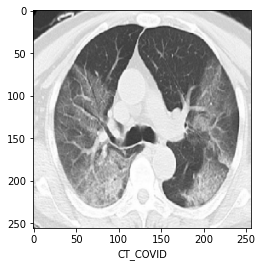

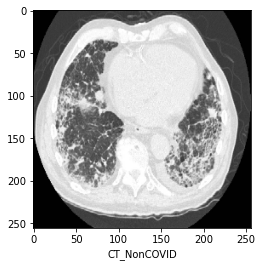

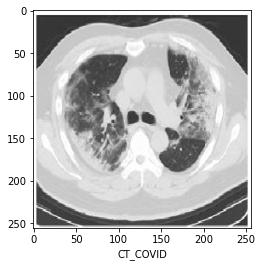

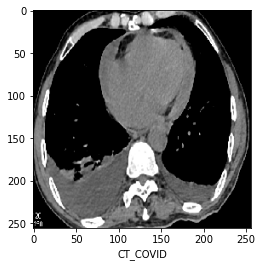

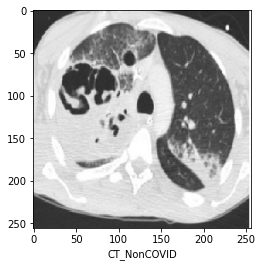

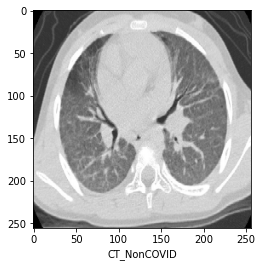

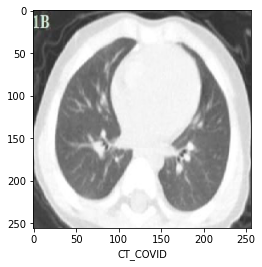

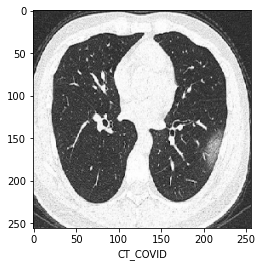

In [5]:
# Displaying few images
sample_x,sample_y = next(train_data)
for x,y in zip( sample_x,sample_y ):
  plt.imshow(x)
  plt.xlabel(classes[y.argmax()])
  plt.show()

In [6]:
# Preparing Model
img_shape=(256,256,3)

model = keras.Sequential(name='RGBimg_Classify_Net')
model.add(keras.layers.Conv2D(128,3,input_shape=(img_shape),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,3,strides=(2,2),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64,3,strides=(2,2),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(len(classes),activation='softmax'))

model.summary()

Model: "RGBimg_Classify_Net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)  

In [8]:
# Training Model
model.compile(optimizer='adam',
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy']
             )

hist = model.fit(train_data,epochs=10)

Epoch 1/10
94/94 [==============================] - 128s 1s/step - loss: 0.4396 - accuracy: 0.7996
Epoch 2/10
94/94 [==============================] - 110s 1s/step - loss: 0.4033 - accuracy: 0.8176
Epoch 3/10
94/94 [==============================] - 116s 1s/step - loss: 0.3821 - accuracy: 0.8385
Epoch 4/10
94/94 [==============================] - 114s 1s/step - loss: 0.3030 - accuracy: 0.8648
Epoch 5/10
94/94 [==============================] - 115s 1s/step - loss: 0.3085 - accuracy: 0.8892
Epoch 6/10
94/94 [==============================] - 120s 1s/step - loss: 0.3220 - accuracy: 0.8489
Epoch 7/10
94/94 [==============================] - 123s 1s/step - loss: 0.1771 - accuracy: 0.9314
Epoch 8/10
94/94 [==============================] - 122s 1s/step - loss: 0.1936 - accuracy: 0.9291
Epoch 9/10
94/94 [==============================] - 115s 1s/step - loss: 0.2321 - accuracy: 0.9128
Epoch 10/10
94/94 [==============================] - 110s 1s/step - loss: 0.1262 - accuracy: 0.9468


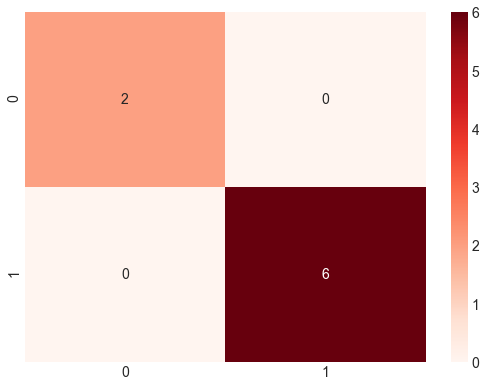

In [14]:
# Prediction of images
sam_x,sam_y = next(train_data) 
pred_ = model.predict(sam_x)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
pred,y =[],[]

for i in range(len(sam_x)):
    t1,t2 = pred_[i].argmax(), sam_y[i].argmax()
    pred.append(t1)
    y.append(t2)

import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y,pred),annot = True, fmt = 'd', cmap = 'Reds');

In [13]:
# Finding Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%',"\n")

Accuracy on the test set: 100.00% 



In [15]:
# Classification report
from sklearn.metrics import classification_report
class_report = classification_report(y, pred, zero_division=1)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         6

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [22]:
acc = hist.history['accuracy']
test_acc = accuracy_score(y, pred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
precision, recall, f1score, _ = precision_recall_fscore_support(y, pred, average='binary')
auc = roc_auc_score(y, pred)

In [23]:
print("Train Accuracy:\t", acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 0.9584450125694275
Test Accuracy:	 1.0
Precision:	 1.0
Recall:		 1.0
F1 Score:	 1.0
AUC:		 1.0


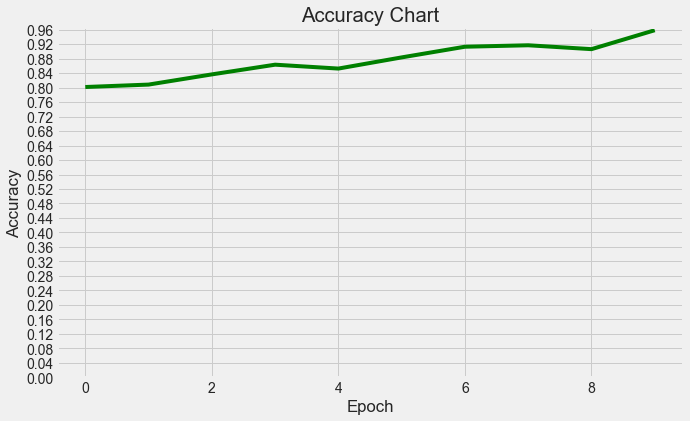

In [24]:
# Model Accuracy Visualisation
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],label='accuracy',color='green')
plt.title('Accuracy Chart')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1, step=0.04))
plt.show()

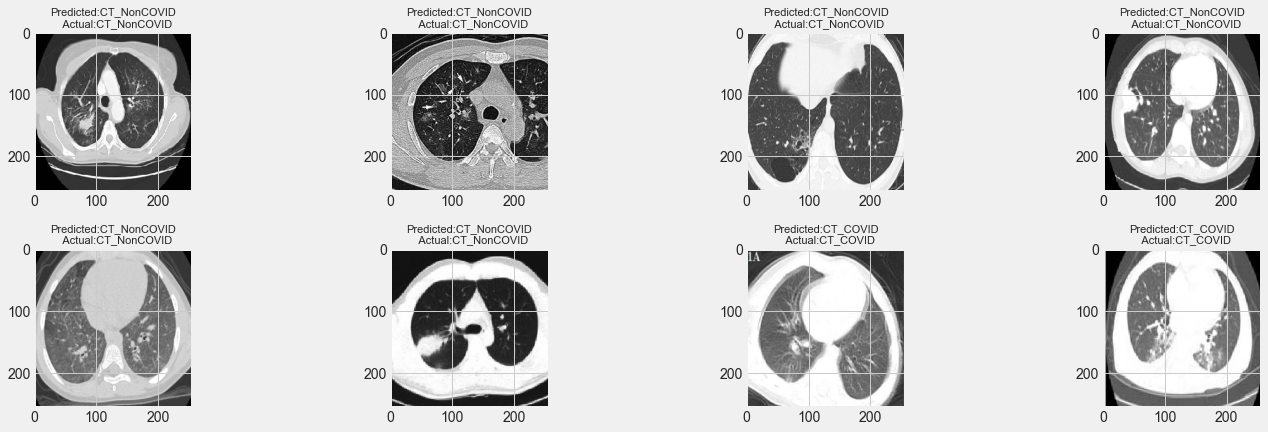

In [25]:
# Prediction
plt.figure(figsize=(20,12))
for i in range(len(sam_x)):
    plt.subplot(4,4,i+1)
    plt.imshow(sam_x[i])
    title_ = 'Predicted:' + classes[pred[i]]+ '\n   Actual:' + classes[y[i]]
    plt.title(title_,size=11)
plt.tight_layout()
plt.show()